In [296]:
####1.1没有缓冲效应计算
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
k12 = 105 / 740  # 大气 -> 海洋 传输系数
k21 = 102 / 900  # 海洋 -> 大气 传输系数
conversion_factor = 2.13  # 将碳含量 (PgC) 转换为 ppm

# 初始条件
N1_initial = 740  # PgC (1987年大气初始碳含量)
N2_initial = 900  # PgC (1987年海洋初始碳含量)

# 读取人为碳排放数据
file_path = 'global.1751_2014.csv'
data = pd.read_csv(file_path)

# 数据预处理
data_clean = data.iloc[1:].copy()  # 跳过第一行描述性信息
data_clean.columns = ['Year', 'Total_emissions', 'Gas_fuel', 'Liquid_fuel',
                      'Solid_fuel', 'Cement', 'Gas_flaring', 'Per_capita']
data_clean['Year'] = pd.to_numeric(data_clean['Year'], errors='coerce')
data_clean['Total_emissions'] = pd.to_numeric(data_clean['Total_emissions'], errors='coerce')

# 筛选1987-2004年数据，并转换单位为PgC
data_1987_2004 = data_clean[(data_clean['Year'] >= 1987) & (data_clean['Year'] <= 2004)]
data_1987_2004['Total_emissions_PgC'] = data_1987_2004['Total_emissions'] * 0.001  # 单位转换

# 获取年份和人为碳排放数据
years = data_1987_2004['Year'].values
gamma = data_1987_2004['Total_emissions_PgC'].values

# 时间步长设置
dt = 1  # 每年为1步
N1 = [N1_initial]  # 大气碳含量列表
N2 = [N2_initial]  # 海洋碳含量列表

# 数值求解 (欧拉法)
for i in range(1, len(years)):
    dN1 = (-k12 * N1[-1] + k21 * N2[-1] + gamma[i-1]) * dt
    dN2 = (k12 * N1[-1] - k21 * N2[-1]) * dt
    N1.append(N1[-1] + dN1)
    N2.append(N2[-1] + dN2)

# 转换为DataFrame并计算CO2浓度 (ppm)
results = pd.DataFrame({'Year': years, 'N1_Atmosphere_PgC': N1, 'N2_Ocean_PgC': N2})
results['CO2_Concentration_ppm'] = results['N1_Atmosphere_PgC'] / conversion_factor


# 输出结果的前几行
results


C:\Users\Administrator\AppData\Local\Temp\ipykernel_39152\3123836013.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1987_2004['Total_emissions_PgC'] = data_1987_2004['Total_emissions'] * 0.001  # 单位转换


,Year,N1_Atmosphere_PgC,N2_Ocean_PgC,CO2_Concentration_ppm
0,1987,740.000000,900.000000,347.417840
1,1988,742.725000,903.000000,348.697183
2,1989,745.614345,906.046655,350.053683
3,1990,748.569002,909.157998,351.440846
4,1991,751.465037,912.335963,352.800487
5,1992,754.378317,915.564683,354.168224
6,1993,757.180148,918.840852,355.483637
7,1994,759.947721,922.143279,356.782967
8,1995,762.800872,925.464128,358.122475
9,1996,765.756548,928.813452,359.510116


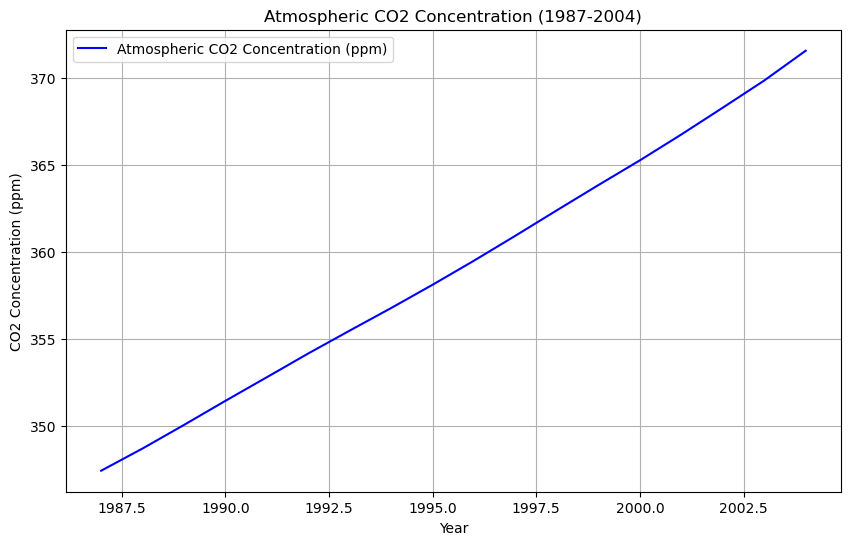

In [284]:
# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot(results['Year'], results['CO2_Concentration_ppm'], label='Atmospheric CO2 Concentration (ppm)', color='b')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Atmospheric CO2 Concentration (1987-2004)')
plt.legend()
plt.grid()
plt.show()

In [286]:
###########1.2有缓冲效应计算
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
k12 = 105 / 740  # 大气 -> 海洋 传输系数
k21 = 102 / 900  # 海洋 -> 大气 传输系数
N2_eq = 821  # 海洋表层平衡碳含量 (PgC)
xi = 3  # 缓冲因子
conversion_factor = 2.13  # 将碳含量 (PgC) 转换为 ppm

# 初始条件
N1_initial = 740  # PgC (1987年大气初始碳含量)
N2_initial = 900  # PgC (1987年海洋初始碳含量)

# 读取人为碳排放数据
file_path = 'global.1751_2014.csv'
data = pd.read_csv(file_path)

# 数据预处理
data_clean = data.iloc[1:].copy()  # 跳过第一行描述性信息
data_clean.columns = ['Year', 'Total_emissions', 'Gas_fuel', 'Liquid_fuel',
                      'Solid_fuel', 'Cement', 'Gas_flaring', 'Per_capita']
data_clean['Year'] = pd.to_numeric(data_clean['Year'], errors='coerce')
data_clean['Total_emissions'] = pd.to_numeric(data_clean['Total_emissions'], errors='coerce')

# 筛选1987-2004年数据，并转换单位为PgC
data_1987_2004 = data_clean[(data_clean['Year'] >= 1987) & (data_clean['Year'] <= 2004)]
data_1987_2004['Total_emissions_PgC'] = data_1987_2004['Total_emissions'] * 0.001  # 单位转换

# 获取年份和人为碳排放数据
years = data_1987_2004['Year'].values
gamma = data_1987_2004['Total_emissions_PgC'].values

# 时间步长设置
dt = 1  # 每年为1步
N1 = [N1_initial]  # 大气碳含量列表
N2 = [N2_initial]  # 海洋碳含量列表

# 数值求解 (欧拉法)
for i in range(1, len(years)):
    dN1 = (-k12 * N1[-1] + k21 * (N2_eq + xi * (N2[-1] - N2_eq)) + gamma[i-1]) * dt
    dN2 = (k12 * N1[-1] - k21 * (N2_eq + xi * (N2[-1] - N2_eq))) * dt
    N1.append(N1[-1] + dN1)
    N2.append(N2[-1] + dN2)

# 转换为DataFrame并计算CO2浓度 (ppm)
results = pd.DataFrame({'Year': years, 'N1_Atmosphere_PgC': N1, 'N2_Ocean_PgC': N2})
results['CO2_Concentration_ppm'] = results['N1_Atmosphere_PgC'] / conversion_factor


# 输出结果的前几行
results



C:\Users\Administrator\AppData\Local\Temp\ipykernel_39152\1944139151.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1987_2004['Total_emissions_PgC'] = data_1987_2004['Total_emissions'] * 0.001  # 单位转换


,Year,N1_Atmosphere_PgC,N2_Ocean_PgC,CO2_Concentration_ppm
0,1987,740.000000,900.000000,347.417840
1,1988,760.631667,885.093333,357.104069
2,1989,773.478600,878.182400,363.135493
3,1990,782.282941,875.444059,367.268986
4,1991,788.914981,874.886019,370.382620
5,1992,794.484255,875.458745,372.997303
6,1993,799.394021,876.626979,375.302357
7,1994,803.996331,878.094669,377.463066
8,1995,808.548624,879.716376,379.600293
9,1996,813.137365,881.432635,381.754631


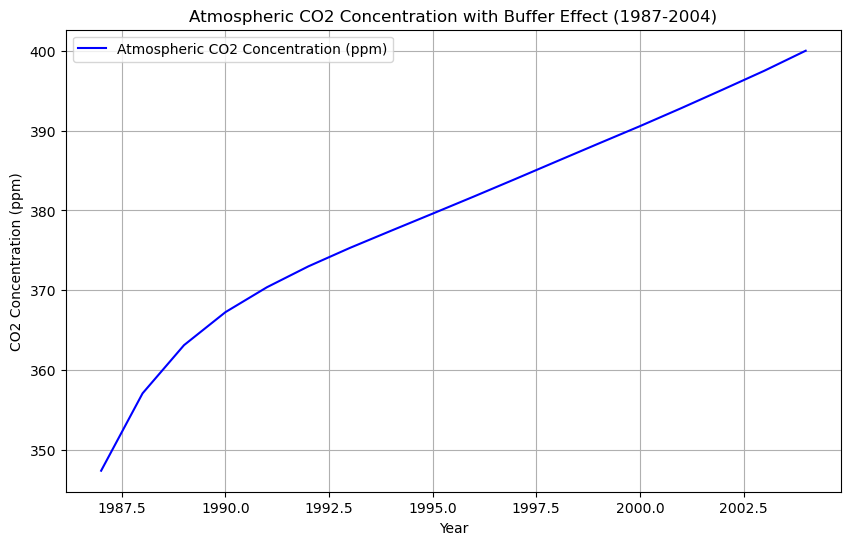

In [280]:
# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot(results['Year'], results['CO2_Concentration_ppm'], label='Atmospheric CO2 Concentration (ppm)', color='b')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Atmospheric CO2 Concentration with Buffer Effect (1987-2004)')
plt.legend()
plt.grid()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_39152\1597422062.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1987_2004['Total_emissions_PgC'] = data_1987_2004['Total_emissions'] * 0.001  # 单位转换
C:\Users\Administrator\AppData\Local\Temp\ipykernel_39152\1597422062.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1987_2004['Total_emissions_PgC'] = data_1987_2004['Total_emissions'] * 0.001  # 单位转换


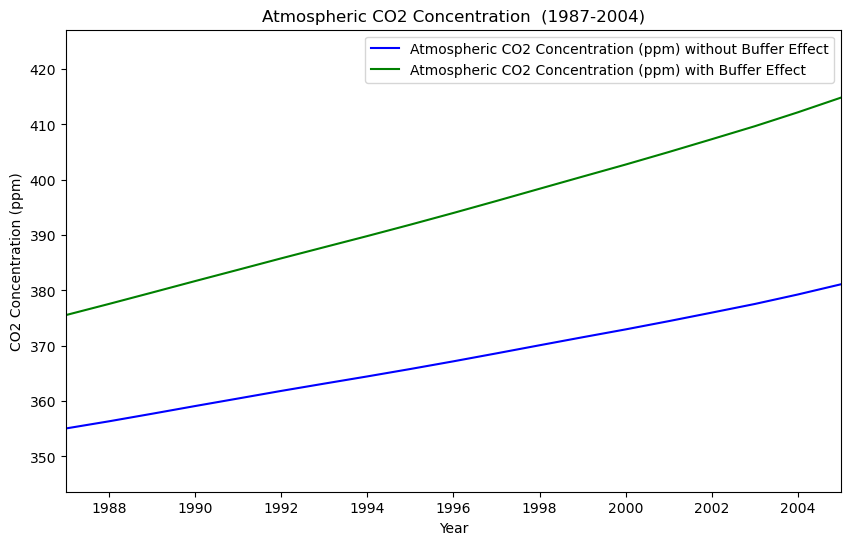

In [288]:

########1.3复现图片

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
####没有缓冲效应计算
# 参数设置
k12 = 105 / 740  # 大气 -> 海洋 传输系数
k21 = 102 / 900  # 海洋 -> 大气 传输系数
conversion_factor = 2.13  # 将碳含量 (PgC) 转换为 ppm

# 初始条件
N1_initial = 740  # PgC (1987年大气初始碳含量)
N2_initial = 900  # PgC (1987年海洋初始碳含量)

# 读取人为碳排放数据
file_path = 'global.1751_2014.csv'
data = pd.read_csv(file_path)

# 数据预处理
data_clean = data.iloc[1:].copy()  # 跳过第一行描述性信息
data_clean.columns = ['Year', 'Total_emissions', 'Gas_fuel', 'Liquid_fuel',
                      'Solid_fuel', 'Cement', 'Gas_flaring', 'Per_capita']
data_clean['Year'] = pd.to_numeric(data_clean['Year'], errors='coerce')
data_clean['Total_emissions'] = pd.to_numeric(data_clean['Total_emissions'], errors='coerce')

# 筛选1987-2004年数据，并转换单位为PgC
data_1987_2004 = data_clean[(data_clean['Year'] >= 1980) & (data_clean['Year'] <= 2008)]
data_1987_2004['Total_emissions_PgC'] = data_1987_2004['Total_emissions'] * 0.001  # 单位转换

# 获取年份和人为碳排放数据
years = data_1987_2004['Year'].values
gamma = data_1987_2004['Total_emissions_PgC'].values

# 时间步长设置
dt = 1  # 每年为1步
N1 = [N1_initial]  # 大气碳含量列表
N2 = [N2_initial]  # 海洋碳含量列表

# 数值求解 (欧拉法)
for i in range(1, len(years)):
    dN1 = (-k12 * N1[-1] + k21 * N2[-1] + gamma[i-1]) * dt
    dN2 = (k12 * N1[-1] - k21 * N2[-1]) * dt
    N1.append(N1[-1] + dN1)
    N2.append(N2[-1] + dN2)

# 转换为DataFrame并计算CO2浓度 (ppm)
results = pd.DataFrame({'Year': years, 'N1_Atmosphere_PgC': N1, 'N2_Ocean_PgC': N2})
results['CO2_Concentration_ppm'] = results['N1_Atmosphere_PgC'] / conversion_factor


# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot(results['Year'], results['CO2_Concentration_ppm'], label='Atmospheric CO2 Concentration (ppm) without Buffer Effect', color='b')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Atmospheric CO2 Concentration (1987-2004)')
plt.legend()
plt.grid()
# plt.show()






####有缓冲效应计算

# 参数设置
k12 = 105 / 740  # 大气 -> 海洋 传输系数
k21 = 102 / 900  # 海洋 -> 大气 传输系数
N2_eq = 821  # 海洋表层平衡碳含量 (PgC)
xi = 3  # 缓冲因子
conversion_factor = 2.13  # 将碳含量 (PgC) 转换为 ppm

# 初始条件
N1_initial = 740  # PgC (1987年大气初始碳含量)
N2_initial = 900  # PgC (1987年海洋初始碳含量)

# 读取人为碳排放数据
file_path = 'global.1751_2014.csv'
data = pd.read_csv(file_path)

# 数据预处理
data_clean = data.iloc[1:].copy()  # 跳过第一行描述性信息
data_clean.columns = ['Year', 'Total_emissions', 'Gas_fuel', 'Liquid_fuel',
                      'Solid_fuel', 'Cement', 'Gas_flaring', 'Per_capita']
data_clean['Year'] = pd.to_numeric(data_clean['Year'], errors='coerce')
data_clean['Total_emissions'] = pd.to_numeric(data_clean['Total_emissions'], errors='coerce')

# 筛选1987-2004年数据，并转换单位为PgC
data_1987_2004 = data_clean[(data_clean['Year'] >= 1980) & (data_clean['Year'] <= 2008)]
data_1987_2004['Total_emissions_PgC'] = data_1987_2004['Total_emissions'] * 0.001  # 单位转换

# 获取年份和人为碳排放数据
years = data_1987_2004['Year'].values
gamma = data_1987_2004['Total_emissions_PgC'].values

# 时间步长设置
dt = 1  # 每年为1步
N1 = [N1_initial]  # 大气碳含量列表
N2 = [N2_initial]  # 海洋碳含量列表

# 数值求解 (欧拉法)
for i in range(1, len(years)):
    dN1 = (-k12 * N1[-1] + k21 * (N2_eq + xi * (N2[-1] - N2_eq)) + gamma[i-1]) * dt
    dN2 = (k12 * N1[-1] - k21 * (N2_eq + xi * (N2[-1] - N2_eq))) * dt
    N1.append(N1[-1] + dN1)
    N2.append(N2[-1] + dN2)

# 转换为DataFrame并计算CO2浓度 (ppm)
results_1 = pd.DataFrame({'Year': years, 'N1_Atmosphere_PgC': N1, 'N2_Ocean_PgC': N2})
results_1['CO2_Concentration_ppm'] = results_1['N1_Atmosphere_PgC'] / conversion_factor



# 设置横坐标的显示范围
plt.xlim(1987, 2005)

plt.plot(results_1['Year'], results_1['CO2_Concentration_ppm'], label='Atmospheric CO2 Concentration (ppm) with Buffer Effect', color='g')


plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Atmospheric CO2 Concentration  (1987-2004)')
plt.legend()
plt.grid()
plt.show()









In [294]:
####附加题



import pandas as pd

# 读取txt文件（使用空格或制表符分隔）
df = pd.read_table('ice.txt', sep="\s+")
# mauna_loa_data = pd.read_csv('co2_annmean_mlo.csv', comment='#', delim_whitespace=True, names=['Year', 'mean', 'unc'])
mauna_loa_data = pd.read_csv('co2_annmean_mlo.csv')
# mauna_loa_data = mauna_loa_data.dropna()  # 去除无效行
mauna_loa_data = mauna_loa_data[['year','mean']]
# 提取1960年及之前的数据
# df = df[(df['Mean_Air_Age'] >= 1770) & (df['Mean_Air_Age'] <= 1960)]
# df = df.rename(columns={'Mean_Air_Age': 'year', 'CO2_ppm': 'mean'})
# print(df)
# 提取1960年之后的数据
mauna_loa_data = mauna_loa_data[(mauna_loa_data['year'] > 1960) & (mauna_loa_data['year'] < 2009)]
combined_data = pd.concat([df, mauna_loa_data], ignore_index=True)
# print(combined_data)


<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_39152\579676314.py:8: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_table('ice.txt', sep="\s+")


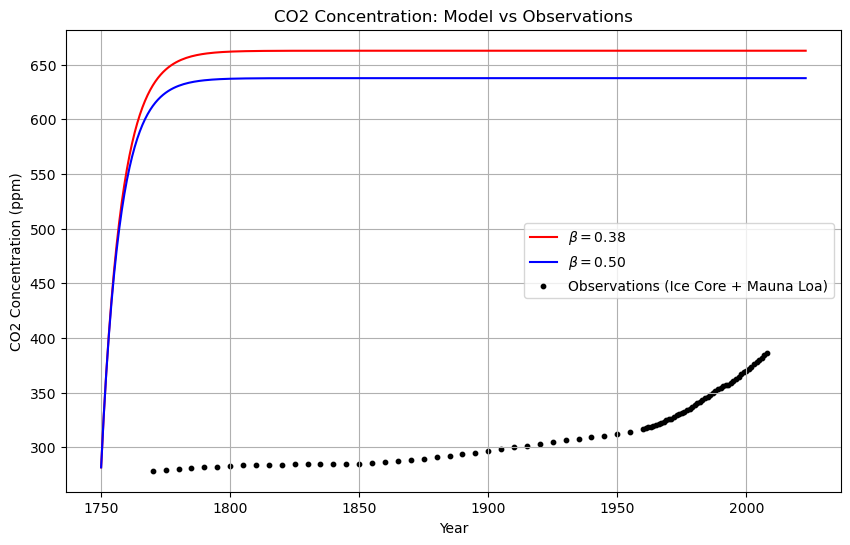

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
k12 = 60 / 615  # 大气 -> 海洋表层
k21 = 60 / 842  # 海洋表层 -> 大气
k23 = 9 / 842   # 海洋表层 -> 中层海洋
k24 = 43 / 842  # 海洋表层 -> 深海
k32 = 52 / 9744 # 中层海洋 -> 海洋表层
k34 = 162 / 9744  # 中层海洋 -> 深海
k43 = 205 / 26280 # 深海 -> 中层海洋
k45 = 0.2 / 26280 # 深海 -> 沉积物
k51 = 0.2 / 90000000  # 沉积物 -> 大气
k67 = 62 / 731  # 生物圈 -> 土壤
k71 = 62 / 1328 # 土壤 -> 大气

conversion_factor = 2.13  # PgC -> ppm

# 初始条件 (1750年)
N1 = [600]  # PgC 大气初始碳含量
N2 = [900]  # PgC 海洋表层
N3 = [3700]  # PgC 中层海洋
N4 = [20000]  # PgC 深海
N5 = [1000]  # PgC 沉积物
N6 = [3000]  # PgC 生物圈
N7 = [2000]  # PgC 土壤

# 参数
dt = 1  # 时间步长 (年)
years = np.arange(1750, 2024)  # 计算时间范围
gamma = 0.5  # 碳排放 (人为)
delta = 62  # 土地使用变化的碳排放
f0 = 62  # PgC/年 初始净初级生产力
beta_38 = 0.38  # beta = 0.38
beta_50 = 0.50  # beta = 0.50

# 定义二氧化碳肥效应函数
def fertilization(beta, P, P0=280):
    return f0 * (1 + beta * np.log(P / P0))


# 存储结果 (beta = 0.38 和 beta = 0.50)
N1_38 = [N1[0]]
N1_50 = [N1[0]]
P_38 = [N1[0] / conversion_factor]  # ppm
P_50 = [N1[0] / conversion_factor]  # ppm

for t in range(1, len(years)):
    # Beta = 0.38
    f_38 = fertilization(beta_38, P_38[-1])
    dN1_38 = (-k12 * N1_38[-1] + k21 * N2[-1] + gamma + delta - f_38 + k51 * N5[-1] + k71 * N7[-1]) * dt
    N1_38.append(N1_38[-1] + dN1_38)
    P_38.append((N1_38[-1]) / conversion_factor)
    
    # Beta = 0.50
    f_50 = fertilization(beta_50, P_50[-1])
    dN1_50 = (-k12 * N1_50[-1] + k21 * N2[-1] + gamma + delta - f_50 + k51 * N5[-1] + k71 * N7[-1]) * dt
    N1_50.append(N1_50[-1] + dN1_50)
    P_50.append((N1_50[-1]) / conversion_factor)



# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot(years, P_38, label=r'$\beta=0.38$', color='red')
plt.plot(years, P_50, label=r'$\beta=0.50$', color='blue')
plt.scatter(combined_data['year'],combined_data['mean'], label='Observations (Ice Core + Mauna Loa)', color='black', s=10)

plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('CO2 Concentration: Model vs Observations')
plt.legend()
plt.grid()
plt.show()

